In [1]:
# # outline and description of the project
# **Introduction**

# Designing a transformer-based, time-aware, self-supervised foundation model for medical EHR data is a complex task, but with careful planning and modular development, it's achievable. Below is a detailed step-by-step guide to help you develop this model, focusing initially on EHR data and structuring it to allow for the future inclusion of image data.

# ---

# **1. Architectural Overview**

# Your model will consist of the following components:

# - **Data Preprocessing Pipeline**
#   - Handling of triplet data: `['data_type', 'value', 'timestamp']`
#   - Encoding of categorical and continuous variables
#   - Time embedding to capture temporal information

# - **Transformer Encoder**
#   - Self-attention mechanism adapted for time-series data
#   - Positional encoding modified for irregular time intervals
#   - Ability to handle variable-length sequences

# - **Self-Supervised Learning Objective**
#   - Masked Reconstruction (similar to BERT's MLM)
#   - Contrastive Learning (e.g., SimCLR adaptation for time-series)

# - **Output Layer**
#   - Generates embeddings for downstream tasks
#   - Interface for adding classification/regression heads

# - **Modularity for Future Extensions**
#   - Design the model to easily incorporate additional modalities (e.g., images)

# ---

# **2. Step-by-Step Development Guide**

# **Step 1: Data Preparation**

# *Objective:* Prepare your data in a format suitable for transformer input.

# - **1.1 Data Collection**
#   - Collect the triplet data: `['data_type', 'value', 'timestamp']` for each patient.
#   - Ensure that the data is anonymized and complies with all relevant regulations.

# - **1.2 Handling Missing Data**
#   - Since you're avoiding imputation, represent missing data explicitly.
#   - Introduce a special token or value to indicate missingness.

# - **1.3 Encoding Data Types**
#   - **Categorical Variables:**
#     - Use embeddings for categorical `data_type`.
#     - Assign a unique index to each `data_type` and initialize a learnable embedding matrix.
#   - **Continuous Variables:**
#     - Normalize or standardize the `value` field.
#     - You may embed continuous values directly or use techniques like discretization followed by embedding.

# - **1.4 Time Encoding**
#   - Compute the time differences between events to capture temporal gaps.
#   - Use relative time embeddings:
#     - Create a function that maps time differences to embeddings.
#     - Alternatively, use continuous time embeddings like Time2Vec.

# - **1.5 Sequence Construction**
#   - For each patient, sort events chronologically.
#   - Construct sequences of triplets ready for model input.

# **Step 2: Model Architecture**

# *Objective:* Build a transformer model tailored for irregular time-series data.

# - **2.1 Input Layer**
#   - **Embedding Layer:**
#     - Embed `data_type` and `value`.
#     - Combine embeddings with time embeddings.
#     - Concatenate or sum the embeddings to get a unified representation.

# - **2.2 Positional Encoding**
#   - Modify standard positional encoding to handle irregular time intervals.
#   - Options include:
#     - **Relative Positional Encoding:**
#       - Use the time difference between events.
#     - **Continuous Positional Encoding:**
#       - Apply functions like sine and cosine to the time stamps.

# - **2.3 Transformer Encoder Layers**
#   - Stack multiple transformer encoder layers.
#   - Adjust attention mechanisms to account for time information.
#     - **Time-Aware Attention:**
#       - Incorporate time embeddings into the attention calculations.
#       - Modify the attention score to decay with increasing time gaps (e.g., using a time-decay function).

# - **2.4 Output Layer**
#   - **Sequence Output:**
#     - Obtain embeddings for each time step.
#   - **Pooling Layer:**
#     - Apply pooling (e.g., mean, max) to get a fixed-size patient-level embedding.
#   - **Embedding Vector:**
#     - Use this vector for downstream tasks.

# **Step 3: Self-Supervised Learning Objective**

# *Objective:* Train the model to learn meaningful representations without labeled data.

# - **3.1 Masked Reconstruction (Masked Modeling)**
#   - Randomly mask portions of the input data (e.g., `value` or `data_type`).
#   - The model tries to reconstruct the masked parts.
#   - **Implementation:**
#     - Create a masking function that selects random positions to mask.
#     - Use a special token or value to indicate masked elements.

# - **3.2 Contrastive Learning**
#   - Generate positive and negative pairs by data augmentation.
#   - The model learns to distinguish between similar and dissimilar sequences.
#   - **Implementation:**
#     - Apply transformations like jittering, scaling, or time warping to create augmented sequences.
#     - Use a contrastive loss function (e.g., InfoNCE).

# - **3.3 Loss Functions**
#   - **Masked Reconstruction Loss:**
#     - Use cross-entropy for categorical variables.
#     - Use mean squared error for continuous variables.
#   - **Contrastive Loss:**
#     - Implement the contrastive loss appropriate for your contrastive learning setup.

# **Step 4: Training Procedure**

# *Objective:* Train the model efficiently, starting on limited hardware.

# - **4.1 Training on 3090Ti**
#   - **Batch Size:**
#     - Start with a small batch size that fits in memory.
#   - **Gradient Accumulation:**
#     - Accumulate gradients over multiple batches to simulate a larger batch size.
#   - **Mixed Precision Training:**
#     - Use FP16 precision to reduce memory usage.

# - **4.2 Scaling Up on A100-80G**
#   - Increase batch size and model complexity as allowed by increased memory.
#   - Consider using multi-GPU training if available.

# - **4.3 Optimization Techniques**
#   - Use learning rate schedulers (e.g., warm-up followed by decay).
#   - Monitor training with validation metrics.

# **Step 5: Model Evaluation and Fine-Tuning**

# *Objective:* Prepare the model for downstream predictive tasks.

# - **5.1 Embedding Extraction**
#   - Extract embeddings from the trained model for each patient.
#   - Save embeddings for use in downstream tasks.

# - **5.2 Adding Task-Specific Heads**
#   - **Classification Head:**
#     - For binary or multi-class classification tasks.
#     - Use a simple feed-forward network on top of embeddings.
#   - **Regression Head:**
#     - For predicting continuous outcomes.
#     - Similarly, use a feed-forward network.

# - **5.3 Fine-Tuning**
#   - Optionally fine-tune the entire model or just the task-specific head on labeled data.
#   - Use appropriate loss functions for the tasks.

# **Step 6: Incorporating Additional Features**

# *Objective:* Ensure that new data types can be added without significant rework.

# - **6.1 Modular Design**
#   - Structure your code to allow easy addition of new `data_type` entries.
#   - Use configuration files or dictionaries to manage `data_type` mappings.

# - **6.2 Embedding Layers**
#   - When adding new features, expand the embedding layers accordingly.
#   - Initialize new embeddings properly (e.g., random initialization or based on similar existing embeddings).

# - **6.3 Re-Training or Fine-Tuning**
#   - Decide whether to retrain the model from scratch or fine-tune it with the new features.
#   - Consider the impact on the existing learned representations.

# **Step 7: Stretch Goal - Generating Synthetic Data**

# *Objective:* Extend the model to generate realistic synthetic data.

# - **7.1 Generative Modeling**
#   - Use models like Variational Autoencoders (VAEs) or Generative Adversarial Networks (GANs).
#   - Adapt these models for sequential, time-series data.

# - **7.2 Model Integration**
#   - Incorporate the generative model into your existing architecture.
#   - Use the encoder for embeddings and add a decoder for data generation.

# - **7.3 Training the Generative Model**
#   - Train the model to reconstruct input sequences or generate new sequences from latent variables.
#   - Evaluate the quality of synthetic data using statistical measures and domain expert assessment.

# ---

# **3. Suggestions to Improve the Plan**

# - **Leverage Existing Libraries**

#   - Use libraries like **PyTorch** or **TensorFlow** for model development.
#   - Consider specialized libraries for time-series transformers, such as **PyTorch Forecasting** or **HuggingFace's Transformers** adapted for time series.

# - **Data Augmentation**

#   - Enhance your training data with augmentation techniques suitable for time-series data.
#   - This can improve model robustness and performance.

# - **Handling Irregular Time Intervals**

#   - Investigate models specifically designed for irregular time-series data, such as the **Temporal Fusion Transformer** or **Transformers with Continuous-Time Models**.

# - **Evaluation Metrics**

#   - Define appropriate metrics for self-supervised learning to monitor training progress.
#   - For downstream tasks, use domain-specific metrics (e.g., ROC-AUC for classification).

# - **Documentation and Code Structure**

#   - Keep your code well-documented to facilitate future modifications.
#   - Use version control systems like **Git** for tracking changes.

# - **Collaboration and Reproducibility**

#   - Consider sharing parts of your code and findings with the research community.
#   - Ensure that your experiments are reproducible by setting random seeds and documenting the environment setup.

# ---

# **4. Future Integration of Image Data**

# - **Modular Embedding Layer for Images**

#   - Develop a separate image encoder (e.g., using CNNs or Vision Transformers).
#   - Extract image embeddings that can be combined with EHR embeddings.

# - **Fusion Techniques**

#   - Explore methods to fuse embeddings from different modalities.
#   - Options include concatenation, attention-based fusion, or gating mechanisms.

# - **Unified Model Training**

#   - Train the multimodal model end-to-end if computational resources allow.
#   - Alternatively, train modality-specific encoders separately and combine them during fine-tuning.

# ---

# **Conclusion**

# By following this detailed guide, you should be able to develop a transformer-based, time-aware, self-supervised foundation model for EHR data. The key is to start with a solid, modular design that allows for scalability and the addition of new features and modalities. Remember to test your model thoroughly at each stage and to document your process for future reference.

# **Next Steps:**

# - Begin implementing the data preprocessing pipeline.
# - Prototype a simple version of the transformer model and test it on a small subset of data.
# - Gradually expand the model complexity and the size of the dataset as you move from the 3090Ti to the A100-80G.
# - Keep in mind the stretch goal of synthetic data generation and plan for its integration in later stages.

In [2]:
# Data Preprocessing Section

import torch
import numpy as np
import pandas as pd
from typing import List, Dict, Tuple
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime
import logging
from tqdm import tqdm
import warnings

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Suppress sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)

class EHRDataPreprocessor:
    def __init__(self, data_path: str, feature_files: List[str], demographic_file: str, max_seq_length: int):
        self.data_path = Path(data_path)
        self.feature_files = feature_files
        self.demographic_file = demographic_file
        self.max_seq_length = max_seq_length
        self.data_types = self._get_data_types()
        self.data_type_to_idx = {dt: idx for idx, dt in enumerate(self.data_types)}
        self.value_normalizer = ValueNormalizer()
        self.reference_date = datetime(2000, 1, 1)
        self.continuous_features = ['hba1c', 'sbp', 'bmi', 'creat']
        self.categorical_features = []

    def _get_data_types(self) -> List[str]:
        return [file.split('.')[0] for file in self.feature_files] + ['demographics']

    def load_and_preprocess_data(self) -> Dict[int, Dict[str, torch.Tensor]]:
        feature_data = self._load_feature_data()
        demographic_data = self._load_demographic_data()
        
        logging.info("Fitting normalizers...")
        self.value_normalizer.fit(feature_data, demographic_data)
        
        logging.info("Preprocessing data...")
        preprocessed_data = {}
        for patient_id in tqdm(feature_data.keys(), desc="Processing patients"):
            patient_feature_data = feature_data[patient_id]
            patient_demographic_data = demographic_data.get(patient_id, {})
            try:
                preprocessed_data[patient_id] = self.preprocess_patient_data(patient_id, patient_feature_data, patient_demographic_data)
            except Exception as e:
                logging.error(f"Error processing patient {patient_id}: {str(e)}")
        
        return preprocessed_data

    def _load_feature_data(self) -> Dict[int, List[Tuple[str, float, float]]]:
        feature_data = {}
        for file in self.feature_files:
            df = pd.read_csv(self.data_path / file)
            feature_name = file.split('.')[0]
            for _, row in df.iterrows():
                patient_id = int(row['patient_id'])
                if patient_id not in feature_data:
                    feature_data[patient_id] = []
                timestamp = (datetime.strptime(row['timestamp'], '%Y-%m-%d') - self.reference_date).days
                value = row['value'] if pd.notna(row['value']) else None
                feature_data[patient_id].append((feature_name, value, float(timestamp)))
        return feature_data

    def _load_demographic_data(self) -> Dict[int, Dict[str, str]]:
        df = pd.read_csv(self.data_path / self.demographic_file)
        return {int(row['patient_id']): {col: str(row[col]) for col in df.columns if col != 'patient_id'} for _, row in df.iterrows()}

    def preprocess_patient_data(self, patient_id: int, feature_data: List[Tuple[str, float, float]], demographic_data: Dict[str, str]) -> Dict[str, torch.Tensor]:
        feature_data.sort(key=lambda x: x[2])
        seq_length = min(len(feature_data) + 1, self.max_seq_length)
        data_type_tensor = torch.zeros(seq_length, dtype=torch.long)
        value_tensor = torch.zeros(seq_length)
        time_tensor = torch.zeros(seq_length)
        mask_tensor = torch.zeros(seq_length, dtype=torch.bool)
        missing_tensor = torch.zeros(seq_length, dtype=torch.bool)

        for i, (data_type, value, timestamp) in enumerate(feature_data[:seq_length - 1]):
            data_type_tensor[i] = self.data_type_to_idx[data_type]
            if value is not None:
                value_tensor[i] = self.value_normalizer.normalize(data_type, value)
                mask_tensor[i] = True
            else:
                missing_tensor[i] = True
            time_tensor[i] = timestamp

        demo_idx = seq_length - 1
        data_type_tensor[demo_idx] = self.data_type_to_idx['demographics']
        value_tensor[demo_idx] = self.value_normalizer.normalize_demographics(demographic_data)
        time_tensor[demo_idx] = time_tensor[demo_idx - 1] if demo_idx > 0 else 0
        mask_tensor[demo_idx] = True

        time_diff_tensor = torch.zeros_like(time_tensor)
        time_diff_tensor[1:] = time_tensor[1:] - time_tensor[:-1]

        return {
            'patient_id': patient_id,
            'data_type': data_type_tensor,
            'value': value_tensor,
            'timestamp': time_tensor,
            'time_diff': time_diff_tensor,
            'mask': mask_tensor,
            'missing': missing_tensor
        }

class ValueNormalizer:
    def __init__(self):
        self.feature_scalers = {}
        self.demographic_encoder = None
        self.demographic_scaler = None
        self.reference_date = datetime(2000, 1, 1)
        self.demographic_columns = []

    def fit(self, feature_data: Dict[int, List[Tuple[str, float, float]]], demographic_data: Dict[int, Dict[str, str]]):
        feature_values = {feature: [] for feature in set(data_type for patient in feature_data.values() for data_type, _, _ in patient)}
        for patient_data in feature_data.values():
            for data_type, value, _ in patient_data:
                if value is not None:
                    feature_values[data_type].append(value)
        
        for feature, values in feature_values.items():
            self.feature_scalers[feature] = StandardScaler().fit(np.array(values).reshape(-1, 1))

        demographic_df = pd.DataFrame(demographic_data).T
        self.demographic_columns = demographic_df.columns.tolist()

        demographic_df['age'] = (pd.to_datetime(demographic_df['DOB'], errors='coerce') - self.reference_date).dt.days / 365.25
        demographic_df['years_since_diagnosis'] = (pd.to_datetime(demographic_df['date_diagnosis'], errors='coerce') - self.reference_date).dt.days / 365.25
        
        categorical_columns = ['dm_type', 'sex', 'ethCode']
        
        self.demographic_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.demographic_encoder.fit(demographic_df[categorical_columns])
        
        numerical_columns = ['age', 'years_since_diagnosis']
        self.demographic_scaler = StandardScaler().fit(demographic_df[numerical_columns].fillna(0))

    def normalize(self, data_type: str, value: float) -> float:
        if data_type in self.feature_scalers:
            return self.feature_scalers[data_type].transform([[value]])[0][0]
        else:
            return value

    def normalize_demographics(self, demographic_data: Dict[str, str]) -> float:
        try:
            dob = pd.to_datetime(demographic_data.get('DOB', '2000-01-01'), errors='coerce')
            diagnosis_date = pd.to_datetime(demographic_data.get('date_diagnosis', '2000-01-01'), errors='coerce')
            
            age = (self.reference_date - dob).days / 365.25 if pd.notnull(dob) else 0
            years_since_diagnosis = (self.reference_date - diagnosis_date).days / 365.25 if pd.notnull(diagnosis_date) else 0
            
            categorical_data = [
                demographic_data.get('dm_type', 'Unknown'),
                demographic_data.get('sex', 'Unknown'),
                demographic_data.get('ethCode', 'Unknown')
            ]
            
            encoded_categorical = self.demographic_encoder.transform([categorical_data])
            scaled_numerical = self.demographic_scaler.transform([[age, years_since_diagnosis]])
            
            all_features = np.concatenate([encoded_categorical.flatten(), scaled_numerical.flatten()])
            
            return float(np.mean(all_features))
        except Exception as e:
            logging.error(f"Error in normalize_demographics: {str(e)}")
            logging.error(f"Demographic data: {demographic_data}")
            return 0.0

# Example usage
data_path = "./processed_data"
feature_files = ["hba1c.csv", "sbp.csv", "bmi.csv", "creat.csv"]
demographic_file = "demographics.csv"
max_seq_length = 40

preprocessor = EHRDataPreprocessor(data_path, feature_files, demographic_file, max_seq_length)
preprocessed_data = preprocessor.load_and_preprocess_data()

logging.info(f"\nPreprocessed data for {len(preprocessed_data)} patients")
first_patient_id = list(preprocessed_data.keys())[0]
logging.info(f"\nSample data for patient {first_patient_id}:")
for key, value in preprocessed_data[first_patient_id].items():
    if isinstance(value, torch.Tensor):
        logging.info(f"{key}: {value.shape}")
    else:
        logging.info(f"{key}: {value}")

2024-10-08 20:33:55,559 - INFO - Fitting normalizers...
2024-10-08 20:34:00,001 - INFO - Preprocessing data...
Processing patients: 100%|██████████| 117081/117081 [03:40<00:00, 530.15it/s] 
2024-10-08 20:37:41,650 - INFO - 
Preprocessed data for 117081 patients
2024-10-08 20:37:41,654 - INFO - 
Sample data for patient 2147483663:
2024-10-08 20:37:41,655 - INFO - patient_id: 2147483663
2024-10-08 20:37:41,655 - INFO - data_type: torch.Size([40])
2024-10-08 20:37:41,655 - INFO - value: torch.Size([40])
2024-10-08 20:37:41,655 - INFO - timestamp: torch.Size([40])
2024-10-08 20:37:41,656 - INFO - time_diff: torch.Size([40])
2024-10-08 20:37:41,656 - INFO - mask: torch.Size([40])
2024-10-08 20:37:41,656 - INFO - missing: torch.Size([40])


In [3]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA GeForce RTX 3090 Ti


In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Sampler
import random

class EHRDataset(Dataset):
    def __init__(self, preprocessed_data):
        self.data = list(preprocessed_data.values())

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        return {
            'patient_id': item['patient_id'],
            'data_type': item['data_type'],
            'value': item['value'],
            'timestamp': item['timestamp'],
            'time_diff': item['time_diff'],
            'mask': item['mask'],
            'missing': item['missing']
        }

def collate_fn(batch):
    batch = sorted(batch, key=lambda x: len(x['data_type']), reverse=True)
    
    lengths = [len(item['data_type']) for item in batch]
    max_len = max(lengths)

    padded_batch = {
        'patient_id': torch.tensor([item['patient_id'] for item in batch]),
        'data_type': pad_sequence([item['data_type'] for item in batch], batch_first=True, padding_value=0),
        'value': pad_sequence([item['value'] for item in batch], batch_first=True, padding_value=0.0),
        'timestamp': pad_sequence([item['timestamp'] for item in batch], batch_first=True, padding_value=0.0),
        'time_diff': pad_sequence([item['time_diff'] for item in batch], batch_first=True, padding_value=0.0),
        'mask': pad_sequence([item['mask'] for item in batch], batch_first=True, padding_value=False),
        'missing': pad_sequence([item['missing'] for item in batch], batch_first=True, padding_value=True)
    }

    attention_mask = torch.zeros(len(batch), max_len, dtype=torch.bool)
    for i, length in enumerate(lengths):
        attention_mask[i, :length] = 1

    padded_batch['attention_mask'] = attention_mask
    padded_batch['lengths'] = torch.tensor(lengths)

    return padded_batch

class PatientSampler(Sampler):
    def __init__(self, dataset, batch_size, drop_last=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.patient_to_indices = self._create_patient_to_indices()

    def _create_patient_to_indices(self):
        patient_to_indices = {}
        for idx, item in enumerate(self.dataset.data):
            patient_id = item['patient_id']
            if patient_id not in patient_to_indices:
                patient_to_indices[patient_id] = []
            patient_to_indices[patient_id].append(idx)
        return patient_to_indices

    def __iter__(self):
        batches = []
        patients = list(self.patient_to_indices.keys())
        random.shuffle(patients)
        
        current_batch = []
        for patient in patients:
            indices = self.patient_to_indices[patient]
            if len(indices) >= 2:
                # Add two instances of the same patient to ensure positive pairs
                current_batch.extend(random.sample(indices, 2))
            elif len(indices) == 1:
                # If only one instance, add it twice
                current_batch.extend(indices * 2)
            
            if len(current_batch) >= self.batch_size:
                batches.append(current_batch[:self.batch_size])
                current_batch = current_batch[self.batch_size:]
        
        if not self.drop_last and current_batch:
            batches.append(current_batch)
        
        random.shuffle(batches)
        return iter(batches)

    def __len__(self):
        if self.drop_last:
            return len(self.dataset) // self.batch_size
        else:
            return (len(self.dataset) + self.batch_size - 1) // self.batch_size


# Create the dataset
dataset = EHRDataset(preprocessed_data)

# Create the patient sampler
patient_sampler = PatientSampler(dataset, batch_size=2)

# Create the dataloader
dataloader = DataLoader(dataset, batch_sampler=patient_sampler, collate_fn=collate_fn)

# Verify that patient_id is included in the batch
for batch in dataloader:
    print("Keys in batch:", batch.keys())
    print("Patient IDs shape:", batch['patient_id'].shape)
    break  # Just check the first batch

Keys in batch: dict_keys(['patient_id', 'data_type', 'value', 'timestamp', 'time_diff', 'mask', 'missing', 'attention_mask', 'lengths'])
Patient IDs shape: torch.Size([2])


In [5]:
# Model Architecture Section

import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class TimeAwareMultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)
        
    def forward(self, query, key, value, time_diff, mask=None):
        batch_size = query.size(0)
        seq_length = query.size(1)
        
        Q = self.W_q(query)
        K = self.W_k(key)
        V = self.W_v(value)
        
        Q = Q.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        K = K.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        V = V.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)
        
        time_diff = time_diff.unsqueeze(1).unsqueeze(1)  # [batch_size, 1, 1, seq_length]
        time_diff = time_diff.expand(-1, self.num_heads, seq_length, -1)  # [batch_size, num_heads, seq_length, seq_length]
        time_diff = torch.abs(time_diff.transpose(-1, -2) - time_diff)
        
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        time_impact = torch.exp(-time_diff.clamp(min=-100, max=100))
        scores = scores * time_impact
        
        if mask is not None:
            scores = scores.masked_fill(~mask.unsqueeze(1).unsqueeze(2), float('-inf'))
        
        attn = F.softmax(scores, dim=-1)
        attn = torch.nan_to_num(attn, 0.0, 0.0, 0.0)  # Replace NaNs with zeros
        context = torch.matmul(attn, V)
        
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)
        output = self.W_o(context)
        
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=0.1)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x, timestamps):
        x = x + self.pe[:x.size(0), :]
        # print(f"In PositionalEncoding, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        return self.dropout(x)

class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.self_attn = TimeAwareMultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, time_diff, mask=None):
        # Apply layer norm before self-attention
        x_norm = self.norm1(x)
        
        attn_output = self.self_attn(x_norm, x_norm, x_norm, time_diff, mask)
        # print(f"After self-attention, output shape: {attn_output.shape}, min: {attn_output.min().item()}, max: {attn_output.max().item()}")
        
        # Add residual connection
        x = x + self.dropout(attn_output)
        x = torch.nan_to_num(x, 0.0, 0.0, 0.0)  # Replace NaNs with zeros
        # print(f"After residual connection, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        
        # Apply layer norm before feed-forward
        x_norm = self.norm2(x)
        ff_output = self.feed_forward(x_norm)
        # print(f"After feed-forward, output shape: {ff_output.shape}, min: {ff_output.min().item()}, max: {ff_output.max().item()}")
        
        # Add residual connection
        x = x + self.dropout(ff_output)
        x = torch.nan_to_num(x, 0.0, 0.0, 0.0)  # Replace NaNs with zeros
        # print(f"After second residual connection, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        
        return x

class EHRTransformer(nn.Module):
    def __init__(self, num_data_types, d_model, num_heads, num_layers, d_ff, dropout):
        super().__init__()
        self.data_type_embedding = nn.Embedding(num_data_types, d_model)
        self.value_embedding = nn.Linear(1, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        
        self.transformer_layers = nn.ModuleList([
            TransformerEncoderLayer(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        self.output_layer = nn.Linear(d_model, d_model)
        self.layer_norm = nn.LayerNorm(d_model)
        
    def forward(self, data_type, value, timestamp, time_diff, attention_mask):
        # Embedding layers
        data_type_emb = self.data_type_embedding(data_type)
        value_emb = self.value_embedding(value.unsqueeze(-1))
        
        # Combine embeddings
        x = data_type_emb + value_emb
        x = torch.clamp(x, min=-100, max=100)  # Prevent extreme values
        
        # print(f"After embedding, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        
        # Add positional encoding using timestamps
        x = self.positional_encoding(x, timestamp)
        x = torch.clamp(x, min=-100, max=100)  # Prevent extreme values
        
        # print(f"After positional encoding, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        
        # Apply transformer layers
        for i, layer in enumerate(self.transformer_layers):
            x = layer(x, time_diff, attention_mask)
            x = torch.clamp(x, min=-100, max=100)  # Prevent extreme values
            x = torch.nan_to_num(x, 0.0, 0.0, 0.0)  # Replace NaNs with zeros
            # print(f"After transformer layer {i+1}, x shape: {x.shape}, min: {x.min().item()}, max: {x.max().item()}")
        
        # Output layer with layer normalization
        output = self.layer_norm(self.output_layer(x))
        output = torch.clamp(output, min=-100, max=100)  # Prevent extreme values
        output = torch.nan_to_num(output, 0.0, 0.0, 0.0)  # Replace NaNs with zeros
        
        # print(f"Final output shape: {output.shape}, min: {output.min().item()}, max: {output.max().item()}")
        
        return output

# Example usage
num_data_types = 100  # Adjust this based on your actual number of data types
d_model = 128
num_heads = 8
num_layers = 6
d_ff = 512
dropout = 0.1

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(f"Using device: {device}")

# Create the model and move it to the device
model = EHRTransformer(num_data_types, d_model, num_heads, num_layers, d_ff, dropout).to(device)

# Create the dataset and dataloader
dataset = EHRDataset(preprocessed_data)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True, collate_fn=collate_fn, pin_memory=True)

# Test the model with a batch
for batch in dataloader:
    # Move the entire batch to the device
    batch = {k: v.to(device) for k, v in batch.items()}
    
    # Print the shape of the mask before passing it to the model
    print(f"Mask shape: {batch['mask'].shape}")
    
    output = model(batch['data_type'], batch['value'], batch['timestamp'], batch['time_diff'], batch['mask'])
    print(f"Output shape: {output.shape}")
    break  # Just to check the first batch

Using device: cpu


Mask shape: torch.Size([512, 40])
Output shape: torch.Size([512, 40, 128])


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import random
import json
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

class MaskedReconstructionLoss(nn.Module):
    def __init__(self, continuous_features, num_categories):
        super().__init__()
        self.mse_loss = nn.MSELoss(reduction='none')
        self.ce_loss = nn.CrossEntropyLoss(reduction='none', ignore_index=-1)
        self.continuous_features = continuous_features
        self.num_categories = num_categories

    def forward(self, predictions, targets, data_type, mask_indices, attention_mask):
        active_loss = (attention_mask.view(-1) == 1) & (mask_indices.view(-1) == 1)
        active_preds = predictions.view(-1, predictions.size(-1))[active_loss]
        active_targets = targets.view(-1)[active_loss]
        active_data_type = data_type.view(-1)[active_loss]

        cont_mask = torch.tensor([dt in self.continuous_features for dt in active_data_type])
        cat_mask = ~cont_mask

        total_loss = 0
        num_samples = active_loss.sum()

        if cont_mask.any():
            cont_preds = active_preds[cont_mask, 0]
            cont_targets = active_targets[cont_mask]
            cont_loss = self.mse_loss(cont_preds, cont_targets).mean()
            total_loss += cont_loss
            # print(f"Continuous Loss: {cont_loss.item():.4f}")
            # print(f"Continuous Preds min/max: {cont_preds.min().item():.4f}/{cont_preds.max().item():.4f}")
            # print(f"Continuous Targets min/max: {cont_targets.min().item():.4f}/{cont_targets.max().item():.4f}")

        if cat_mask.any():
            cat_preds = active_preds[cat_mask]
            cat_targets = active_targets[cat_mask].long()
            cat_targets = torch.clamp(cat_targets, min=0, max=self.num_categories-1)
            cat_loss = self.ce_loss(cat_preds, cat_targets).mean()
            total_loss += cat_loss
            # print(f"Categorical Loss: {cat_loss.item():.4f}")
            # print(f"Categorical Preds min/max: {cat_preds.min().item():.4f}/{cat_preds.max().item():.4f}")
            # print(f"Categorical Targets min/max: {cat_targets.min().item()}/{cat_targets.max().item()}")

        return total_loss

class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.5):
        super().__init__()
        self.temperature = temperature

    def forward(self, embeddings, patient_ids):
        if torch.isnan(embeddings).any():
            print("NaN detected in embeddings!")
            return torch.tensor(0.0, requires_grad=True)

        embeddings = F.normalize(embeddings, p=2, dim=1)
        
        sim_matrix = torch.matmul(embeddings, embeddings.T) / self.temperature
        
        pos_mask = (patient_ids.unsqueeze(0) == patient_ids.unsqueeze(1)).float()
        pos_mask.fill_diagonal_(0)
        
        if pos_mask.sum() == 0:
            print("No positive pairs found in the batch!")
            return torch.tensor(0.0, requires_grad=True)

        neg_mask = 1 - pos_mask
        neg_mask.fill_diagonal_(0)

        pos_sim = torch.exp(sim_matrix) * pos_mask
        neg_sim = torch.exp(sim_matrix) * neg_mask

        loss = -torch.log(pos_sim.sum(dim=1) / (pos_sim.sum(dim=1) + neg_sim.sum(dim=1) + 1e-8))
        return loss.mean()
        

def mask_data(data, mask, mask_ratio=0.15):
    mask_indices = torch.rand_like(data.float()) < mask_ratio
    mask_indices = mask_indices & mask
    masked_data = data.clone()
    masked_data[mask_indices] = 0
    return masked_data, mask_indices

def train_epoch(model, dataloader, optimizer, continuous_features, num_categories, device, mask_ratio=0.15, clip_value=1.0):
    model.train()
    total_loss = 0
    reconstruction_loss_fn = MaskedReconstructionLoss(continuous_features, num_categories).to(device)
    contrastive_loss_fn = ContrastiveLoss().to(device)
    
    epoch_losses = {
        'total': [],
        'reconstruction': [],
        'contrastive': []
    }

    for batch_idx, batch in enumerate(tqdm(dataloader, desc="Training")):
        optimizer.zero_grad()

        # Move individual tensors to device
        data_type = batch['data_type'].to(device)
        value = batch['value'].to(device)
        timestamp = batch['timestamp'].to(device)
        time_diff = batch['time_diff'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        patient_ids = batch['patient_id'].to(device)

        masked_value, mask_indices = mask_data(value, attention_mask, mask_ratio)
        mask_indices = mask_indices.to(device)

        try:
            output = model(data_type, masked_value, timestamp, time_diff, attention_mask)
            
            if torch.isnan(output).any():
                print(f"NaN detected in model output at batch {batch_idx}")
                print(f"Input shapes: data_type {data_type.shape}, masked_value {masked_value.shape}, timestamp {timestamp.shape}, time_diff {time_diff.shape}, attention_mask {attention_mask.shape}")
                print(f"Output shape: {output.shape}")
                print(f"Output min/max: {output.min().item()}/{output.max().item()}")
                continue

            recon_loss = reconstruction_loss_fn(output, value, data_type, mask_indices, attention_mask)
            
            mean_embedding = (output * attention_mask.unsqueeze(-1)).sum(dim=1) / (attention_mask.sum(dim=1, keepdim=True) + 1e-8)
            contrastive_loss = contrastive_loss_fn(mean_embedding, patient_ids)

            contrastive_weight = 0.1
            loss = recon_loss + contrastive_weight * contrastive_loss

            if not torch.isnan(loss) and not torch.isinf(loss):
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
                optimizer.step()

                total_loss += loss.item()
                epoch_losses['total'].append(loss.item())
                epoch_losses['reconstruction'].append(recon_loss.item())
                epoch_losses['contrastive'].append(contrastive_loss.item())

            # if batch_idx % 10 == 0:
                # print(f"Batch {batch_idx} losses - Total: {loss.item():.4f}, Recon: {recon_loss.item():.4f}, Contrastive: {contrastive_loss.item():.4f}")
                #print(f"Unique patient IDs in batch: {patient_ids.unique().shape[0]}")
                #print(f"Patient ID counts: {torch.bincount(patient_ids)}")

        except Exception as e:
            print(f"Error in batch {batch_idx}: {str(e)}")
            print("Batch keys:", batch.keys())
            for key, value in batch.items():
                print(f"{key} shape: {value.shape}")
            continue

    return total_loss / len(dataloader), epoch_losses

# In the main training loop
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)  # Reduced learning rate

def train_model(model, dataloader, num_epochs, learning_rate, device, continuous_features, num_categories):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    all_losses = []
    
    torch.cuda.synchronize()

    for epoch in range(num_epochs):
        loss, epoch_losses = train_epoch(model, dataloader, optimizer, device, continuous_features, num_categories)
        all_losses.append(epoch_losses)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
        
    torch.cuda.synchronize()
    
    # Save losses to file
    with open('training_losses.json', 'w') as f:
        json.dump(all_losses, f)
    print("Loss data saved to 'training_losses.json'")
    
    # Plot losses
    plot_losses(all_losses)

    return model, all_losses

def plot_losses(all_losses):
    epochs = range(1, len(all_losses) + 1)
    
    plt.figure(figsize=(12, 8))
    
    # Total Loss
    total_losses = [np.mean(epoch['total']) for epoch in all_losses]
    plt.plot(epochs, total_losses, label='Total Loss', marker='o')
    print('total_losses:' + str(total_losses))
    
    # Reconstruction Loss
    recon_losses = [np.mean(epoch['reconstruction']) for epoch in all_losses]
    plt.plot(epochs, recon_losses, label='Reconstruction Loss', marker='s')
    print('recon_losses:' + str(recon_losses))
    
    # Contrastive Loss
    contrastive_losses = [np.mean(epoch['contrastive']) for epoch in all_losses]
    plt.plot(epochs, contrastive_losses, label='Contrastive Loss', marker='^')
    print('contrastive_losses:' + str(contrastive_losses))
    plt.title('Training Losses over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Save the plot
    plt.savefig('training_losses.png')
    print("Loss plot saved as 'training_losses.png'")
    
    # Display the plot (if running in an interactive environment)
    plt.show()
    
    # Close the plot to free up memory
    plt.close()

# Example usage
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 2
learning_rate = 1e-4
continuous_features = ['hba1c', 'sbp', 'bmi', 'creat']  # Update this list based on your data
num_categories = 40  # Set this to the number of categories in your categorical variables

# model, losses = train_model(model, dataloader, num_epochs, learning_rate, device, continuous_features, num_categories)

In [7]:
# device = torch.device("cpu")
# print(f"Using device: {device}")

# # Set a smaller batch size
# batch_size = 32

# # Create the dataset
# dataset = EHRDataset(preprocessed_data)

# # Create the patient sampler
# patient_sampler = PatientSampler(dataset, batch_size=batch_size)

# # Create the dataloader
# dataloader = DataLoader(dataset, batch_sampler=patient_sampler, collate_fn=collate_fn)

# # Training loop
# num_epochs = 2
# model = EHRTransformer(num_data_types, d_model, num_heads, num_layers, d_ff, dropout).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# for epoch in range(num_epochs):
#     try:
#         loss, epoch_losses = train_epoch(model, dataloader, optimizer, device, continuous_features, num_categories)
#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}")
#     except Exception as e:
#         print(f"Error in epoch {epoch+1}: {str(e)}")
#         continue

Using device: cpu


Training: 7318it [09:03, 13.47it/s]                          


Epoch 1/30, Loss: 1.3269


Training: 7318it [09:01, 13.51it/s]                          


Epoch 2/30, Loss: 1.0689


Training: 7318it [09:04, 13.43it/s]                          


Epoch 3/30, Loss: 1.0419


Training: 7318it [09:01, 13.52it/s]                          


Epoch 4/30, Loss: 1.0193


Training: 7318it [09:06, 13.38it/s]                          


Epoch 5/30, Loss: 0.9902


Training: 7318it [09:06, 13.40it/s]                          


Epoch 6/30, Loss: 0.9779


Training: 7318it [09:08, 13.35it/s]                          


Epoch 7/30, Loss: 0.9699


Training: 7318it [09:10, 13.29it/s]                          


Epoch 8/30, Loss: 0.9641


Training: 7318it [09:08, 13.35it/s]                          


Epoch 9/30, Loss: 0.9603


Training: 7318it [09:11, 13.27it/s]                          


Epoch 10/30, Loss: 0.9570


Training: 7318it [09:09, 13.33it/s]                          


Epoch 11/30, Loss: 0.9520


Training: 7318it [09:12, 13.26it/s]                          


Epoch 12/30, Loss: 0.9513


Training: 7318it [09:16, 13.16it/s]                          


Epoch 13/30, Loss: 0.9469


Training: 7318it [09:07, 13.37it/s]                          


Epoch 14/30, Loss: 0.9450


Training: 7318it [09:03, 13.46it/s]                          


Epoch 15/30, Loss: 0.9433


Training: 7318it [09:10, 13.30it/s]                          


Epoch 16/30, Loss: 0.9425


Training: 7318it [09:18, 13.11it/s]                          


Epoch 17/30, Loss: 0.9411


Training: 7318it [09:15, 13.18it/s]                          


Epoch 18/30, Loss: 0.9377


Training: 7318it [09:08, 13.34it/s]                          


Epoch 19/30, Loss: 0.9388


Training: 7318it [09:14, 13.19it/s]                          


Epoch 20/30, Loss: 0.9364


Training: 7318it [09:13, 13.22it/s]                          


Epoch 21/30, Loss: 0.9352


Training: 7318it [09:12, 13.25it/s]                          


Epoch 22/30, Loss: 0.9340


Training: 7318it [09:13, 13.22it/s]                          


Epoch 23/30, Loss: 0.9321


Training: 7318it [09:17, 13.13it/s]                          


Epoch 24/30, Loss: 0.9303


Training: 7318it [09:18, 13.11it/s]                          


Epoch 25/30, Loss: 0.9320


Training: 7318it [09:15, 13.16it/s]                          


Epoch 26/30, Loss: 0.9286


Training: 7318it [09:15, 13.18it/s]                          


Epoch 27/30, Loss: 0.9307


Training: 7318it [09:11, 13.28it/s]                          


Epoch 28/30, Loss: 0.9291


Training: 7318it [09:12, 13.24it/s]                          


Epoch 29/30, Loss: 0.9293


Training: 7318it [09:16, 13.15it/s]                          

Epoch 30/30, Loss: 0.9284


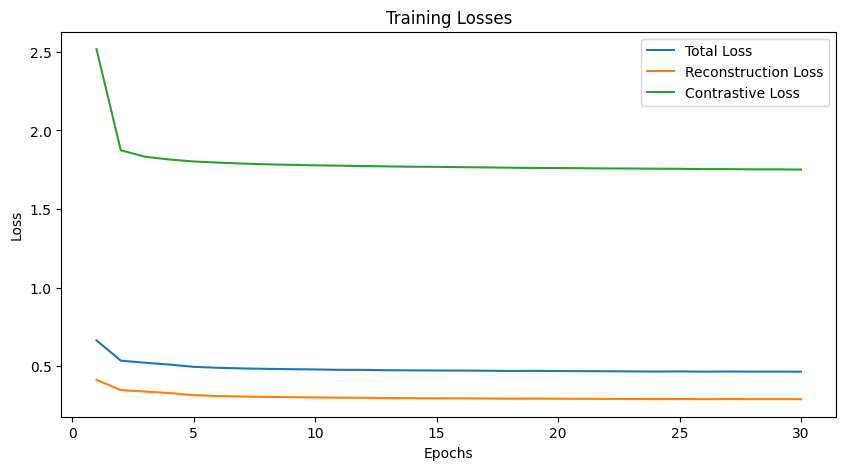

In [9]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cpu")
print(f"Using device: {device}")

def plot_losses(losses):
    epochs = range(1, len(losses['total']) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, losses['total'], label='Total Loss')
    plt.plot(epochs, losses['reconstruction'], label='Reconstruction Loss')
    plt.plot(epochs, losses['contrastive'], label='Contrastive Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    plt.show()
    
# Create the dataset
dataset = EHRDataset(preprocessed_data)

batch_size = 32
# Create the patient sampler
patient_sampler = PatientSampler(dataset, batch_size=batch_size)

# Create the dataloader
dataloader = DataLoader(dataset, batch_sampler=patient_sampler, collate_fn=collate_fn)

# Training loop
model = EHRTransformer(num_data_types, d_model, num_heads, num_layers, d_ff, dropout).to(device)

# Assuming you have already defined and initialized your model, optimizer, dataloader, etc.
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Training loop
num_epochs = 30
all_losses = {'total': [], 'reconstruction': [], 'contrastive': []}

for epoch in range(num_epochs):
    epoch_loss, epoch_losses = train_epoch(model, dataloader, optimizer, continuous_features, num_categories, device)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    
    all_losses['total'].append(sum(epoch_losses['total']) / len(epoch_losses['total']))
    all_losses['reconstruction'].append(sum(epoch_losses['reconstruction']) / len(epoch_losses['reconstruction']))
    all_losses['contrastive'].append(sum(epoch_losses['contrastive']) / len(epoch_losses['contrastive']))

# Plot losses
plot_losses(all_losses)

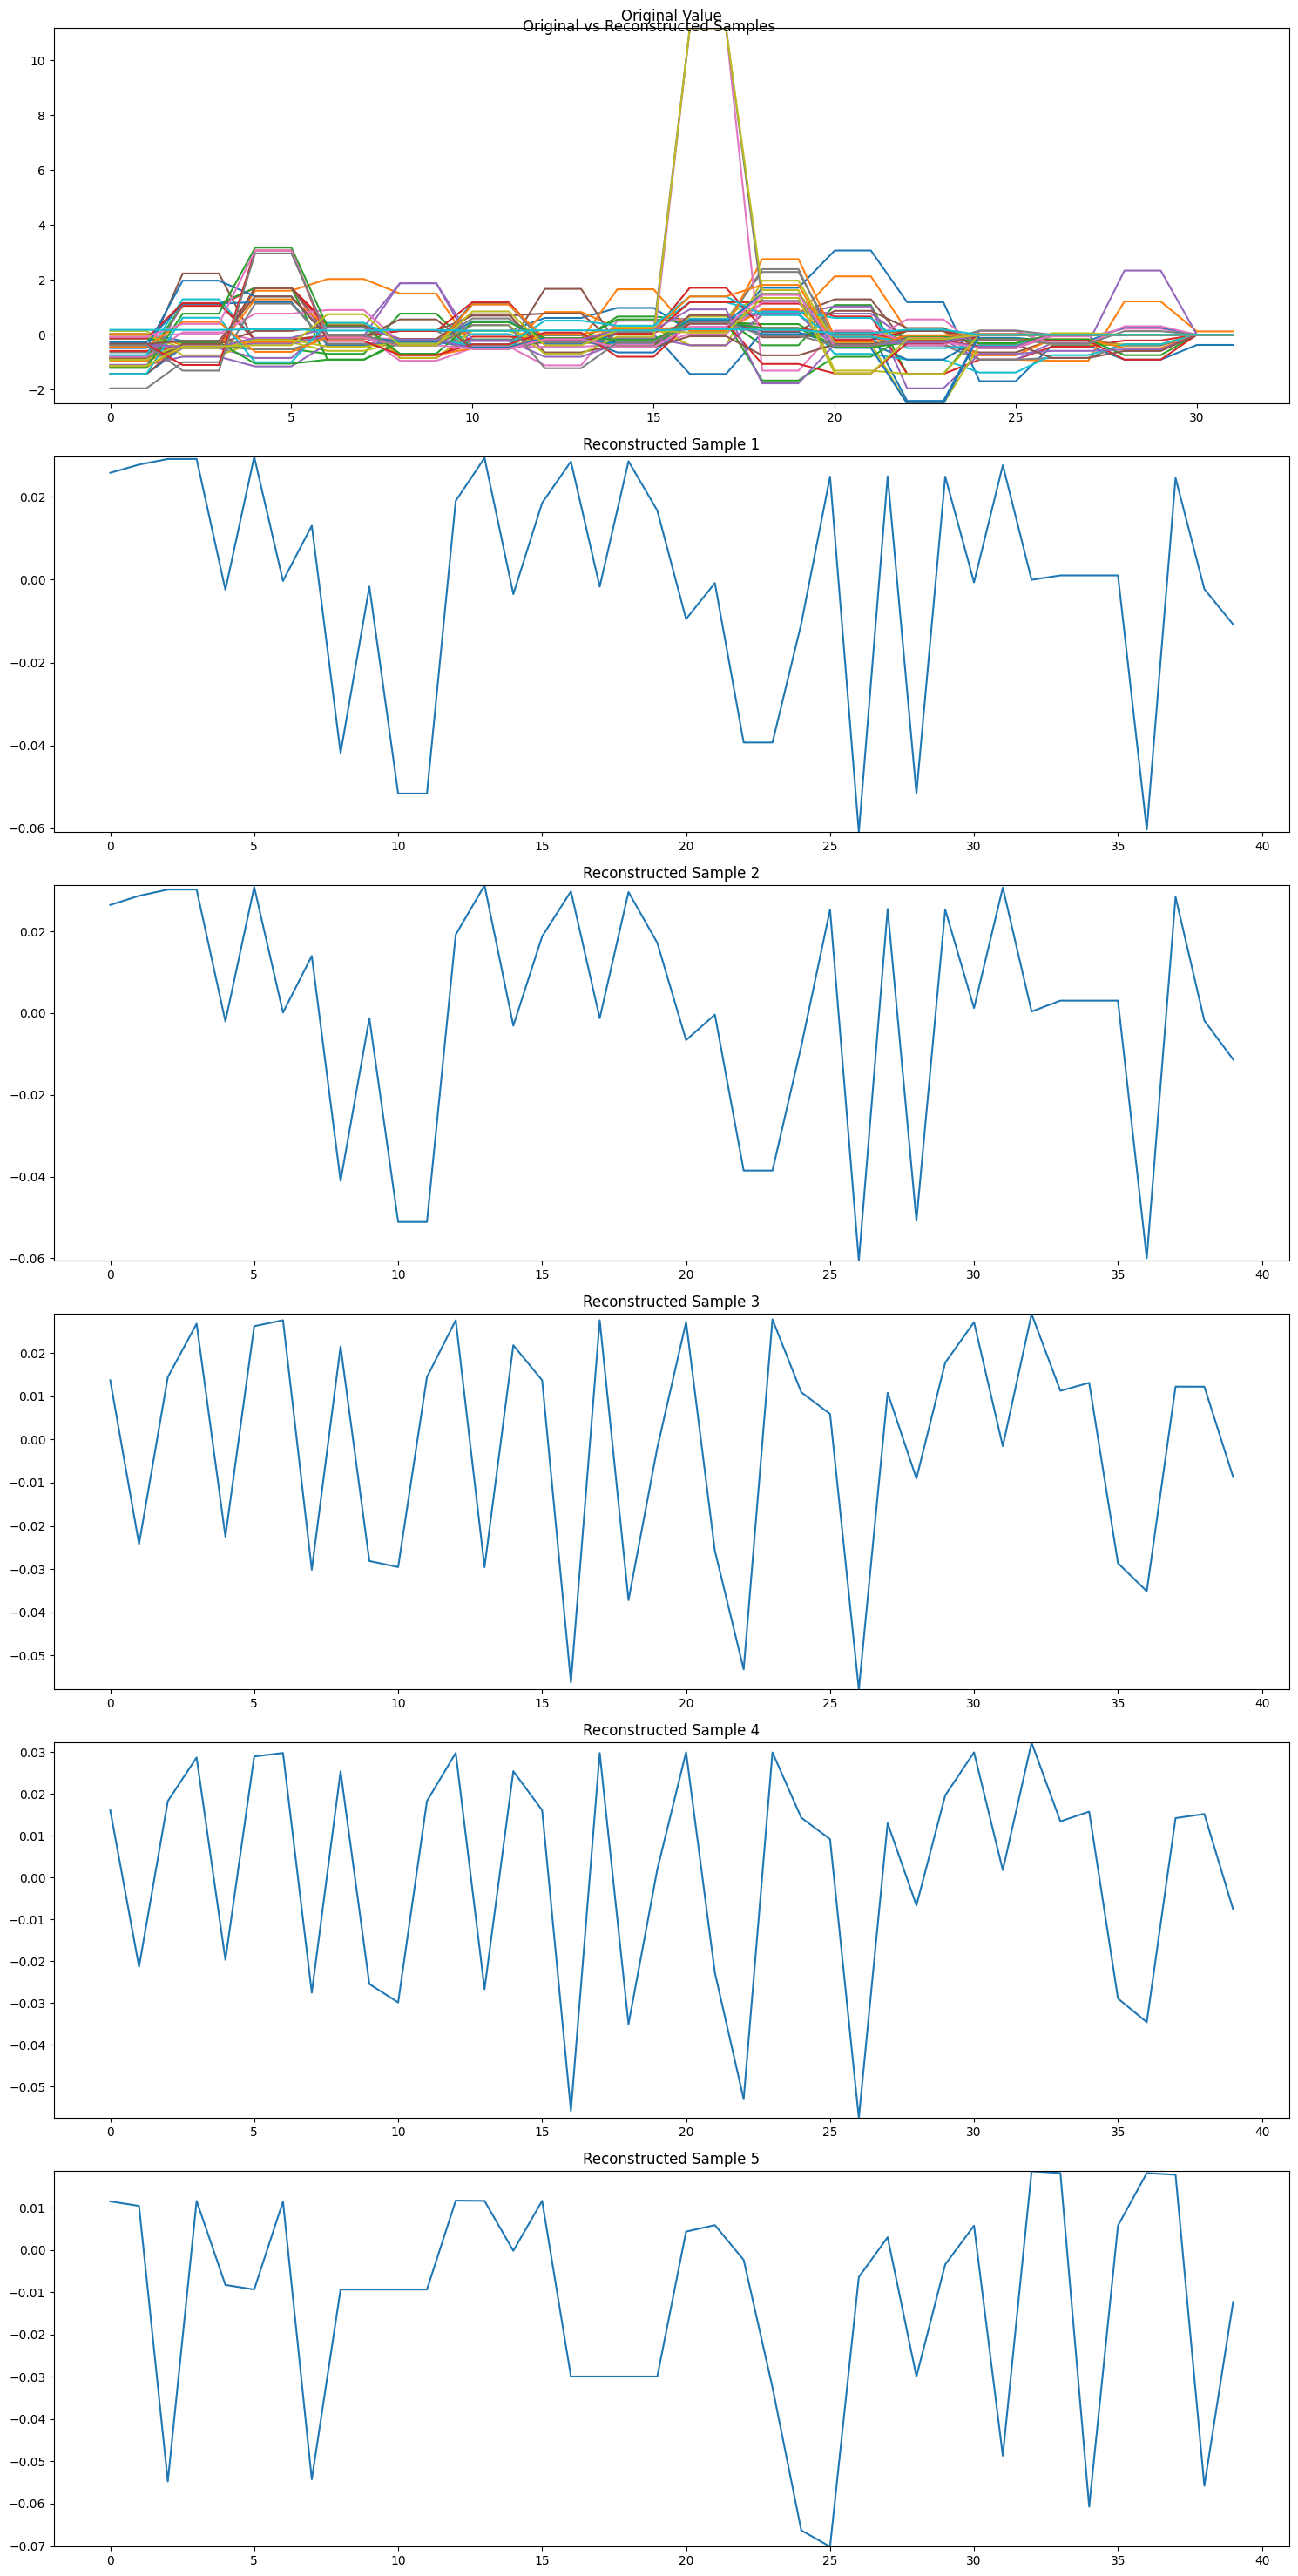

In [15]:
import torch
import matplotlib.pyplot as plt

def reconstruct_and_compare_features(model, dataloader, device, num_samples=5):
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            # Move data to the same device as model
            data_type = batch['data_type'].to(device)
            value = batch['value'].to(device)
            timestamp = batch['timestamp'].to(device)
            time_diff = batch['time_diff'].to(device)
            attention_mask = batch['attention_mask'].to(device) if 'attention_mask' in batch else torch.ones_like(data_type, dtype=torch.bool).to(device)

            # Get model output
            output = model(data_type, value, timestamp, time_diff, attention_mask)

            # Plot original value and reconstructed samples
            fig, axs = plt.subplots(num_samples + 1, 1, figsize=(15, 5 * (num_samples + 1)))
            fig.suptitle("Original vs Reconstructed Samples")

            # Plot original value
            axs[0].plot(value.cpu().numpy())
            axs[0].set_title("Original Value")
            axs[0].set_ylim(value.min().item(), value.max().item())

            # Plot reconstructed samples
            for i in range(num_samples):
                # Take the mean across all features for visualization
                reconstructed = output[i, :, :].mean(dim=1).cpu().numpy()
                axs[i+1].plot(reconstructed)
                axs[i+1].set_title(f"Reconstructed Sample {i+1}")
                axs[i+1].set_ylim(reconstructed.min(), reconstructed.max())

            plt.tight_layout()
            plt.show()

            break  # Only process one batch

# Assuming you have your trained model and dataloader
reconstruct_and_compare_features(model, dataloader, device, num_samples=5)

In [14]:
print("Value shape:", value.shape)
print("Output shape:", output.shape)

Value shape: torch.Size([40])
Output shape: torch.Size([512, 40, 128])
